# Using KMeans Clustering to compress an image
Part of the Standford x DeepLearning course

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance) 
        
    return idx

In [3]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
          points = X[idx == k]
          centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [4]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [5]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    
    return centroids

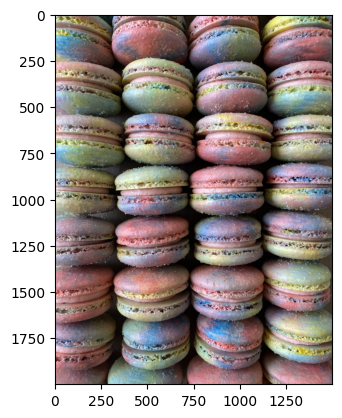

In [10]:
original_img = plt.imread('../../datasets/images/rainbow_macs.jpg')
plt.imshow(original_img)

In [11]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (2000, 1500, 3)


In [12]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [13]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [14]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (3000000,)
Closest centroid for the first five elements: [10 10 10 10 10]


In [15]:
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

/var/folders/cl/jrjgywq95pvc95g_k8kn89hw0000gn/T/ipykernel_96085/4244987712.py:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


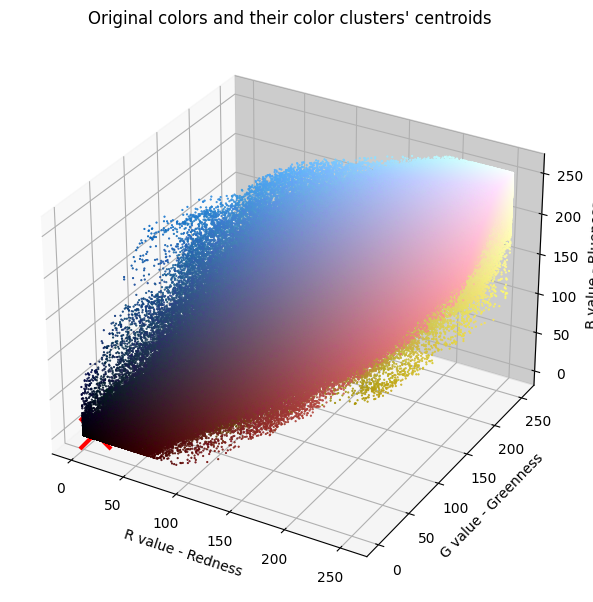

In [16]:
plot_kMeans_RGB(X_img, centroids, idx, K)

## Definitely need a smaller image next time but this is really cool.

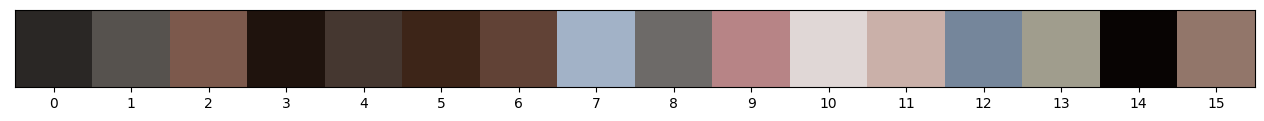

In [17]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

show_centroid_colors(centroids)

In [18]:
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

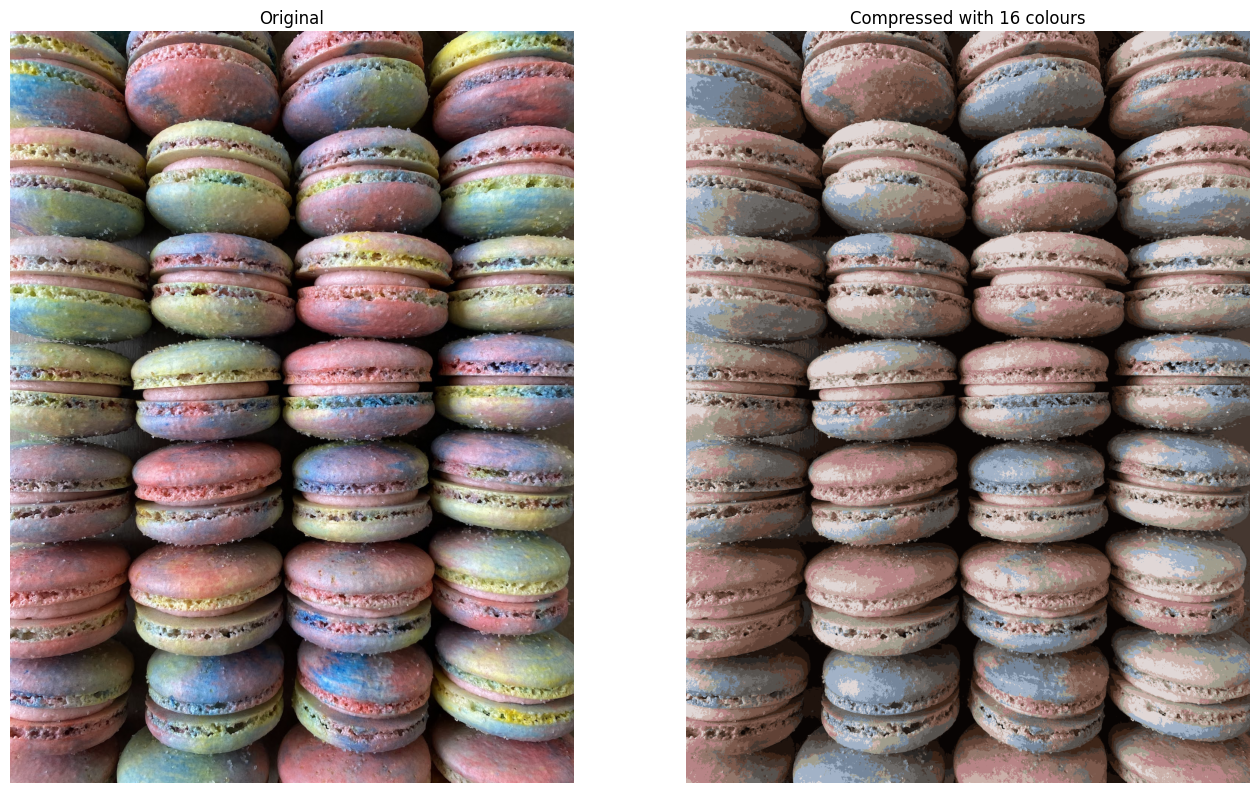

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()